In [1]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

train_df['input_str'] = train_df['input_str'].apply(lambda x : x[3:])
valid_df['input_str'] = valid_df['input_str'].apply(lambda x : x[3:])

In [2]:
num_feat = 47

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

## One Hot Encoding

In [3]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
from preprocess import one_hot_encode

train_df, valid_df, y_train, y_valid = one_hot_encode(train_df, valid_df)

In [4]:
y_valid.shape

(489,)

In [5]:
x_train = train_df.values
x_valid = valid_df.values

In [6]:
x_valid.shape

(489, 467)

In [7]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.65      0.71      0.68       252
     Class 1       0.66      0.60      0.63       237

    accuracy                           0.66       489
   macro avg       0.66      0.65      0.65       489
weighted avg       0.66      0.66      0.66       489

Accuracy is 0.656441717791411
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:45:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.71      0.68      0.70       252
     Class 1       0.68      0.71      0.69       237

    accuracy                           0.70       489
   macro avg       0.70      0.70      0.70       489
weighted avg       0.70      0.70      0.70       489

Accuracy is 0.6952965235173824
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.66      0.67      0.67       252
     Class 1       0.65      0.63      0.64       237

    accuracy                           0.65       489
   macro avg       0.65      0.65      0.65       489
weighted avg       0.65      0.65      0.65       489

Accuracy is 0.65439672801636
==========Logistic Regression==========
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.68      0.69      0.68       252
     Class 1     

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.59      0.47      0.53       252
     Class 1       0.54      0.65      0.59       237

    accuracy                           0.56       489
   macro avg       0.57      0.56      0.56       489
weighted avg       0.57      0.56      0.56       489

Accuracy is 0.5603271983640081
==========SVC==========


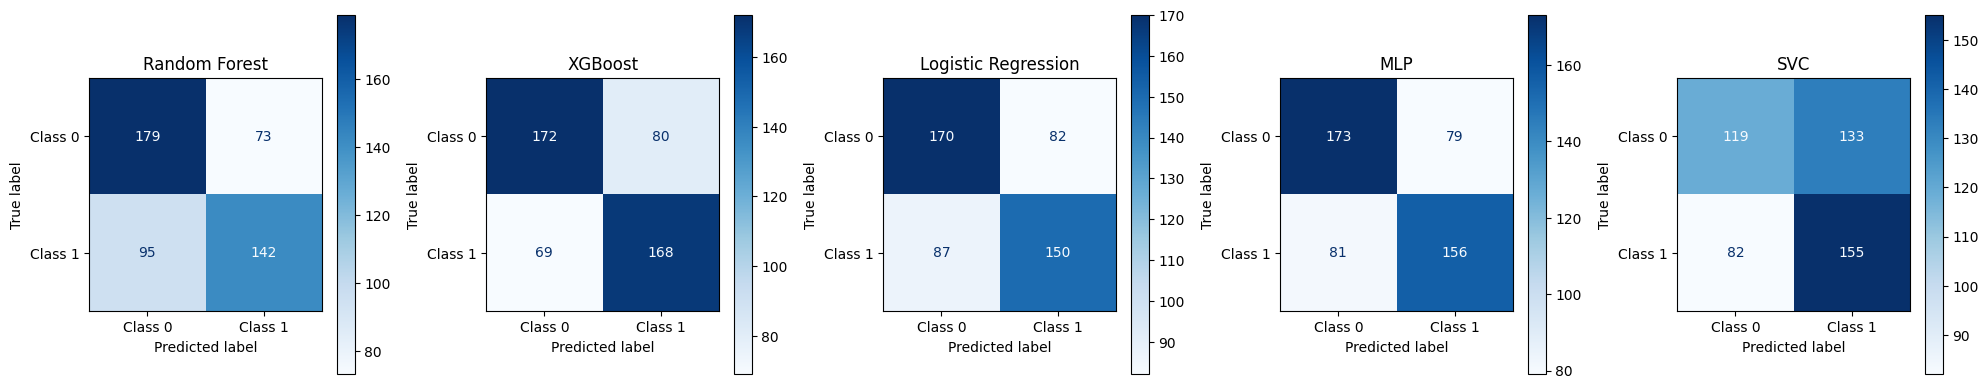

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()

In [9]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred_mnb = model.predict(x_valid)

MultinomialNB()

==========Multinomial Naive Bayes==========
              precision    recall  f1-score   support

     Class 0       0.62      0.64      0.63       252
     Class 1       0.60      0.58      0.59       237

    accuracy                           0.61       489
   macro avg       0.61      0.61      0.61       489
weighted avg       0.61      0.61      0.61       489

Accuracy is 0.6114519427402862
==========Multinomial Naive Bayes==========


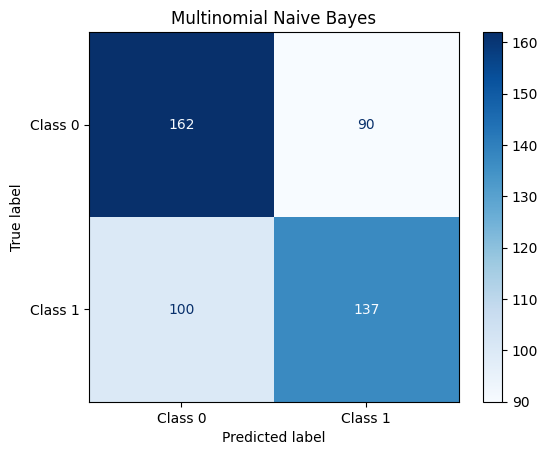

In [11]:
evaluate_predictions(y_valid, y_pred_mnb, 'Multinomial Naive Bayes')